In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, plot_roc_curve

In [8]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/SSU_데이터_사이언스/Week13/Online/train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [10]:
df.shape

(7352, 563)

In [12]:
df.columns.values

array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

In [13]:
df['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

In [15]:
df['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [16]:
df['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

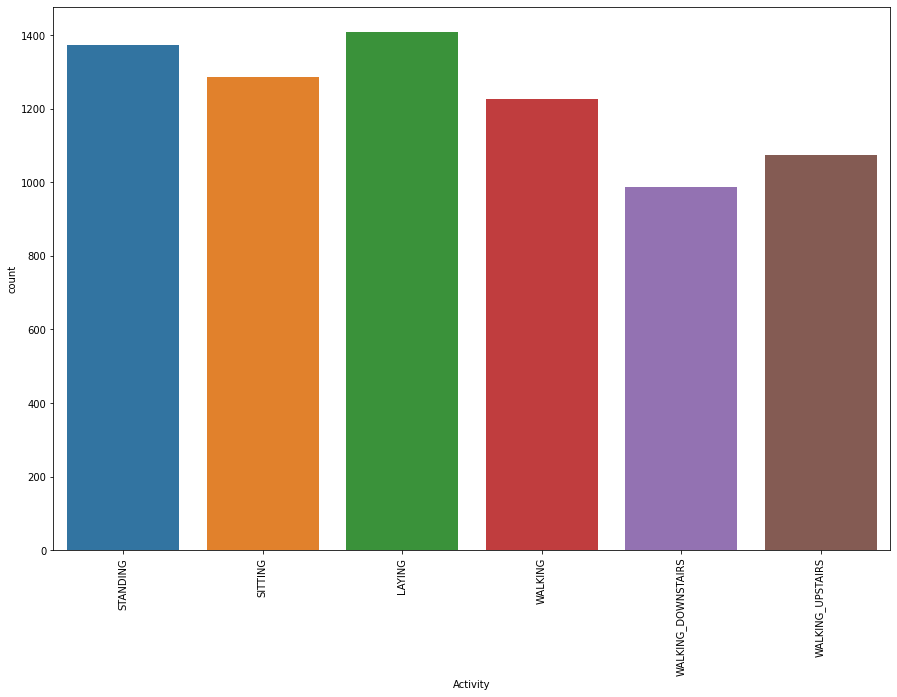

In [19]:
plt.figure(figsize = (15, 10))
sns.countplot(x = 'Activity', data = df)

plt.xticks(x = df['Activity'], rotation = 90)
plt.show()

In [21]:
df.groupby('subject')['Activity'].nunique()

subject
1     6
3     6
5     6
6     6
7     6
8     6
11    6
14    6
15    6
16    6
17    6
19    6
21    6
22    6
23    6
25    6
26    6
27    6
28    6
29    6
30    6
Name: Activity, dtype: int64

In [23]:
pd.set_option('display.max_row', None)
#pd.reset_option('all')

df.groupby('subject')['Activity'].value_counts()

subject  Activity          
1        WALKING               95
         STANDING              53
         WALKING_UPSTAIRS      53
         LAYING                50
         WALKING_DOWNSTAIRS    49
         SITTING               47
3        LAYING                62
         STANDING              61
         WALKING_UPSTAIRS      59
         WALKING               58
         SITTING               52
         WALKING_DOWNSTAIRS    49
5        STANDING              56
         WALKING               56
         LAYING                52
         WALKING_DOWNSTAIRS    47
         WALKING_UPSTAIRS      47
         SITTING               44
6        LAYING                57
         STANDING              57
         WALKING               57
         SITTING               55
         WALKING_UPSTAIRS      51
         WALKING_DOWNSTAIRS    48
7        WALKING               57
         STANDING              53
         LAYING                52
         WALKING_UPSTAIRS      51
         SITTING    

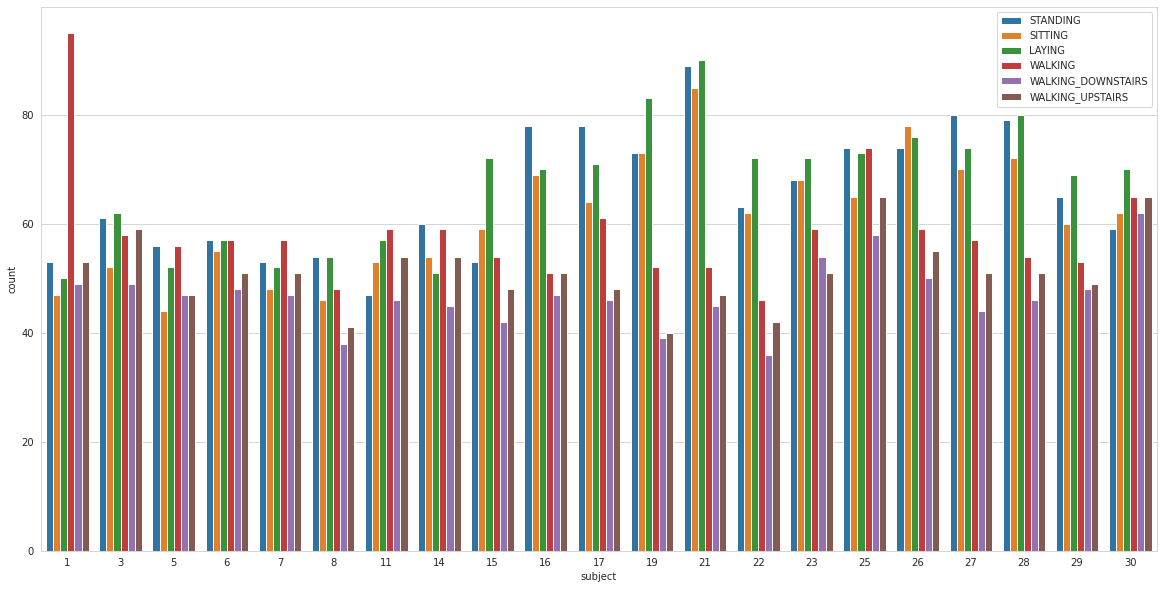

In [31]:
plt.figure(figsize = (20, 10))

sns.set_style('whitegrid')
sns.countplot(x = 'subject', hue = 'Activity', data = df)

plt.legend(loc = 'upper right')
plt.show()

In [34]:
x = df.drop('Activity', axis = 1, inplace = False)
y = df['Activity']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 128)

In [57]:
dtc = DecisionTreeClassifier(max_depth = 12, random_state = 128)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=128)

In [58]:
y_predict = dtc.predict(x_test)

In [59]:
confusion_matrix(y_test, y_predict)

array([[269,   0,   0,   0,   0,   0],
       [  0, 221,  17,   0,   0,   0],
       [  0,  11, 291,   0,   0,   0],
       [  0,   0,   0, 244,   5,  11],
       [  0,   0,   0,   9, 176,   7],
       [  0,   0,   0,  12,   8, 190]])

In [60]:
accuracy_score(y_test, y_predict)

0.9456152277362339

In [49]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 128,
 'splitter': 'best'}

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
params = {'max_depth' : [n for n in range(5, 30)]}

In [53]:
grid_cv = GridSearchCV(dtc, param_grid = params, scoring = 'accuracy', cv = 5, return_train_score = True)

In [55]:
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=6, random_state=128),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                       26, 27, 28, 29]},
             return_train_score=True, scoring='accuracy')

In [56]:
# max depth 12가 제일 높은 score를 보여줌

cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.640388,0.267680,0.012307,0.002497,5,{'max_depth': 5},0.882753,0.912415,0.901361,0.904762,...,0.899850,0.009800,25,0.921769,0.908183,0.918810,0.921360,0.920723,0.918169,0.005095
1,2.308416,0.621546,0.023741,0.019625,6,{'max_depth': 6},0.915888,0.931122,0.909014,0.923469,...,0.919402,0.007453,24,0.947066,0.942189,0.941552,0.946227,0.944740,0.944355,0.002171
2,1.861678,0.026234,0.011200,0.001170,7,{'max_depth': 7},0.931181,0.931973,0.923469,0.933673,...,0.930624,0.003673,23,0.964073,0.957917,0.956642,0.966844,0.964293,0.961954,0.003960
3,2.059286,0.036848,0.010629,0.000947,8,{'max_depth': 8},0.938828,0.939626,0.928571,0.933673,...,0.935725,0.004125,9,0.977466,0.977471,0.972157,0.980021,0.977046,0.976832,0.002564
4,2.221662,0.031643,0.009788,0.000192,9,{'max_depth': 9},0.943076,0.937925,0.931122,0.937925,...,0.938445,0.004232,2,0.988095,0.986610,0.983634,0.987885,0.986610,0.986567,0.001592
5,2.418384,0.024370,0.012289,0.002416,10,{'max_depth': 10},0.943925,0.937075,0.933673,0.935374,...,0.938275,0.003802,3,0.992347,0.991711,0.988310,0.994261,0.990648,0.991456,0.001964
6,2.558361,0.024983,0.010441,0.000876,11,{'max_depth': 11},0.945624,0.931973,0.937075,0.942177,...,0.938104,0.005127,4,0.994685,0.994049,0.992136,0.997237,0.991711,0.993964,0.001983
7,2.708356,0.061759,0.012154,0.002815,12,{'max_depth': 12},0.945624,0.936224,0.930272,0.932823,...,0.936744,0.005301,7,0.997662,0.995749,0.994899,0.998300,0.994687,0.996259,0.001464
8,3.051594,0.478759,0.010593,0.000996,13,{'max_depth': 13},0.943076,0.931122,0.932823,0.932823,...,0.936744,0.005538,6,0.998512,0.997450,0.995962,0.998937,0.998300,0.997832,0.001053
9,3.178275,0.633744,0.010765,0.000876,14,{'max_depth': 14},0.939677,0.935374,0.931973,0.936224,...,0.936915,0.003297,5,0.998937,0.998087,0.997237,0.999575,0.999362,0.998640,0.000867


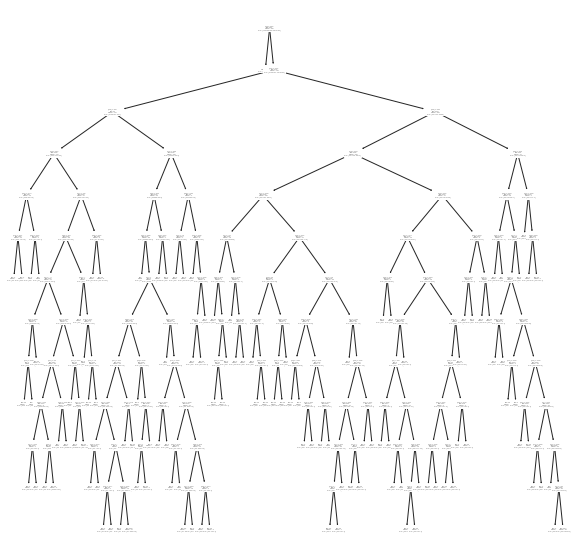

In [62]:
from sklearn import tree

plt.figure(figsize = (10, 10))
tree.plot_tree(dtc)

plt.show()

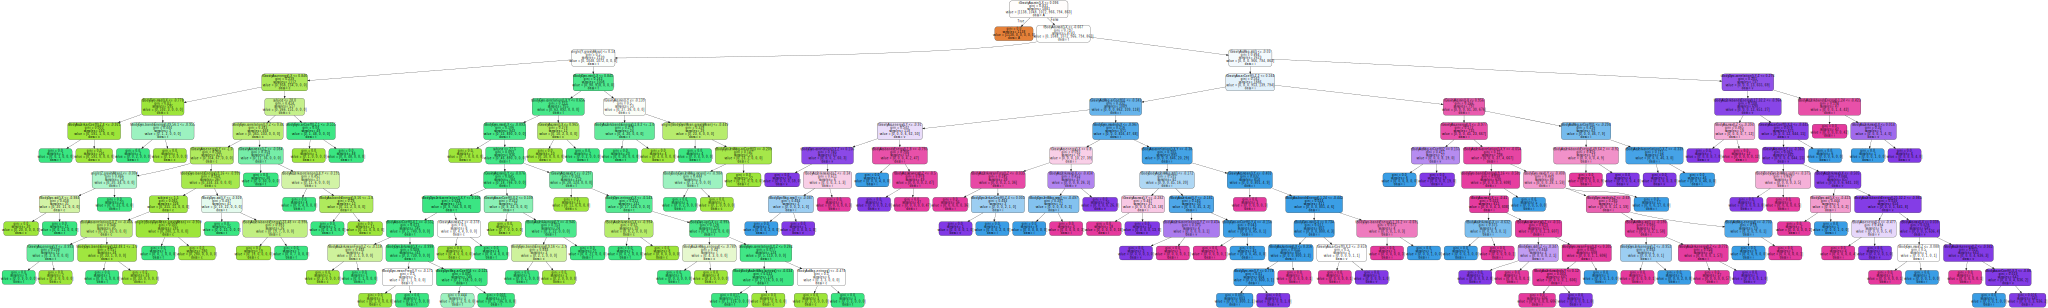

In [64]:
import graphviz

dot_data = tree.export_graphviz(dtc, filled=True, rounded = True, feature_names=df.columns[:-1],  class_names=df.columns[-1]) 
                                                                  #feature_names=df.columns[:-1],  class_names=df.columns[-1]

graph = graphviz.Source(dot_data)
graph.render('test') # pdf 파일로 저장이 됨
graph